In [55]:
import simulation_library
import potentials
import integrators
import data_logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import visuals
import time

In [56]:
system_1 = system_builder.build_system(dim = 2, T = 0.01, rho = 0.3, N = 1, placement_method = "random", boundary_conditions = "none")
system_1.particles = []
system_1.add_particle(simulation_library.Particle(potentials.WCAPotential(0.02, 0.02), np.array([0,0.5]), np.array([0,-0.5])))
# system_2.add_particle(simulation_library.Particle(potentials.WCAPotential(0.02, 0.025), np.array([0,0.5])))
system_builder.add_central_potential(system_1, "double_well", a = 1,
                                     b = 1,
                                     c = 1,
                                     d = 1,
                                    )
system_2.get_integrator("verlet_neighbors", 0.001, r_nl = 1.25)
system_2.get_thermostat("anderson", T= 1, freq = 1)
coords_logger_2 = data_logging.CoordinateLogger(system_2, 150)
energy_logger_2 = data_logging.EnergyLogger(system_2, 500)
pressure_logger_2 = data_logging.PressureLogger(system_2, 500)
temp_logger_2 = data_logging.TemperatureLogger(system_2, 100)
system_2.registerObserver(coords_logger_2)
system_2.registerObserver(energy_logger_2)
system_2.registerObserver(pressure_logger_2)
system_2.registerObserver(temp_logger_2)

0.18257418583505539
[[ 0.8078208  -0.06203382]]


In [57]:
t1 = time.time()
system_1.run(1)
t2 = time.time()
print("Verlet Pairwise:", t2 - t1, "seconds")

AttributeError: 'NoneType' object has no attribute 'integrate'

In [69]:
system_2 = system_builder.build_system(dim = 2, T = 0.01, rho = 0.3, N = 1, placement_method = "random", boundary_conditions = "none")
system_2.particles = []
system_2.add_particle(simulation_library.Particle(potentials.WCAPotential(0.02, 0.02), np.array([0,0.5]), np.array([0,-0.5])))
# system_2.add_particle(simulation_library.Particle(potentials.WCAPotential(0.02, 0.025), np.array([0,0.5])))
system_builder.add_central_potential(system_2, "mueller", alpha = 0.1,
                                     A = [-200, -100, -170, 15],
                                     a = [-1, -1, -6.5, 0.7],
                                     b = [0, 0, 11, 0.6],
                                     c = [-10, -10, -6.5, 0.7],
                                     xj = [1, 0, -0.5, -1],
                                     yj = [0, 0.5, 1.5, 1]
                                    )
system_2.get_integrator("verlet_neighbors", 0.001, r_nl = 1.25)
system_2.get_thermostat("anderson", T= 1, freq = 100)
coords_logger_2 = data_logging.CoordinateLogger(system_2, 150)
energy_logger_2 = data_logging.EnergyLogger(system_2, 500)
pressure_logger_2 = data_logging.PressureLogger(system_2, 500)
temp_logger_2 = data_logging.TemperatureLogger(system_2, 100)
system_2.registerObserver(coords_logger_2)
system_2.registerObserver(energy_logger_2)
system_2.registerObserver(pressure_logger_2)
system_2.registerObserver(temp_logger_2)


0.18257418583505539
[[-0.58286015 -0.55543449]]


In [86]:
t1 = time.time()
system_2.run(50000)
t2 = time.time()
print("Verlet Neighbors:", t2 - t1, "seconds")

Verlet Neighbors: 11.94278335571289 seconds


In [87]:
def data_plot(system_nl, energy_logger_nl, temp_logger_nl, pressure_logger_nl):
    fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = [15,7.5], dpi = 400)
    ax[0,0].plot(energy_logger_nl.steps, energy_logger_nl.H)
    ax[0,0].plot(energy_logger_nl.steps, energy_logger_nl.U)
    ax[0,0].plot(energy_logger_nl.steps, energy_logger_nl.K)
    ax[0,0].legend(["Total", "Potential", "Kinetic"], borderpad = 0.3)
    ax[0,0].set_ylabel("Energy")
    ax[0,1].plot(temp_logger_nl.steps, temp_logger_nl.T)
    ax[0,1].set_ylabel("Temperature")
    ax[1,0].plot(pressure_logger_nl.steps, pressure_logger_nl.P)
    ax[1,0].set_ylabel("Pressure")
    ax[1,1].scatter(*system_nl.get_coordinates().transpose())
    # ax[1,1].set_xlim([-system_nl.box[0]/2,system_nl.box[0]/2])
    # ax[1,1].set_ylim([-system_nl.box[1]/2,system_nl.box[1]/2])
    ax[1,1].set_xlabel("X Axis")
    ax[1,1].set_ylabel("Y Axis")
    # fig.suptitle("Rho = " + str(rho), y= 0.98)
    fig.tight_layout()

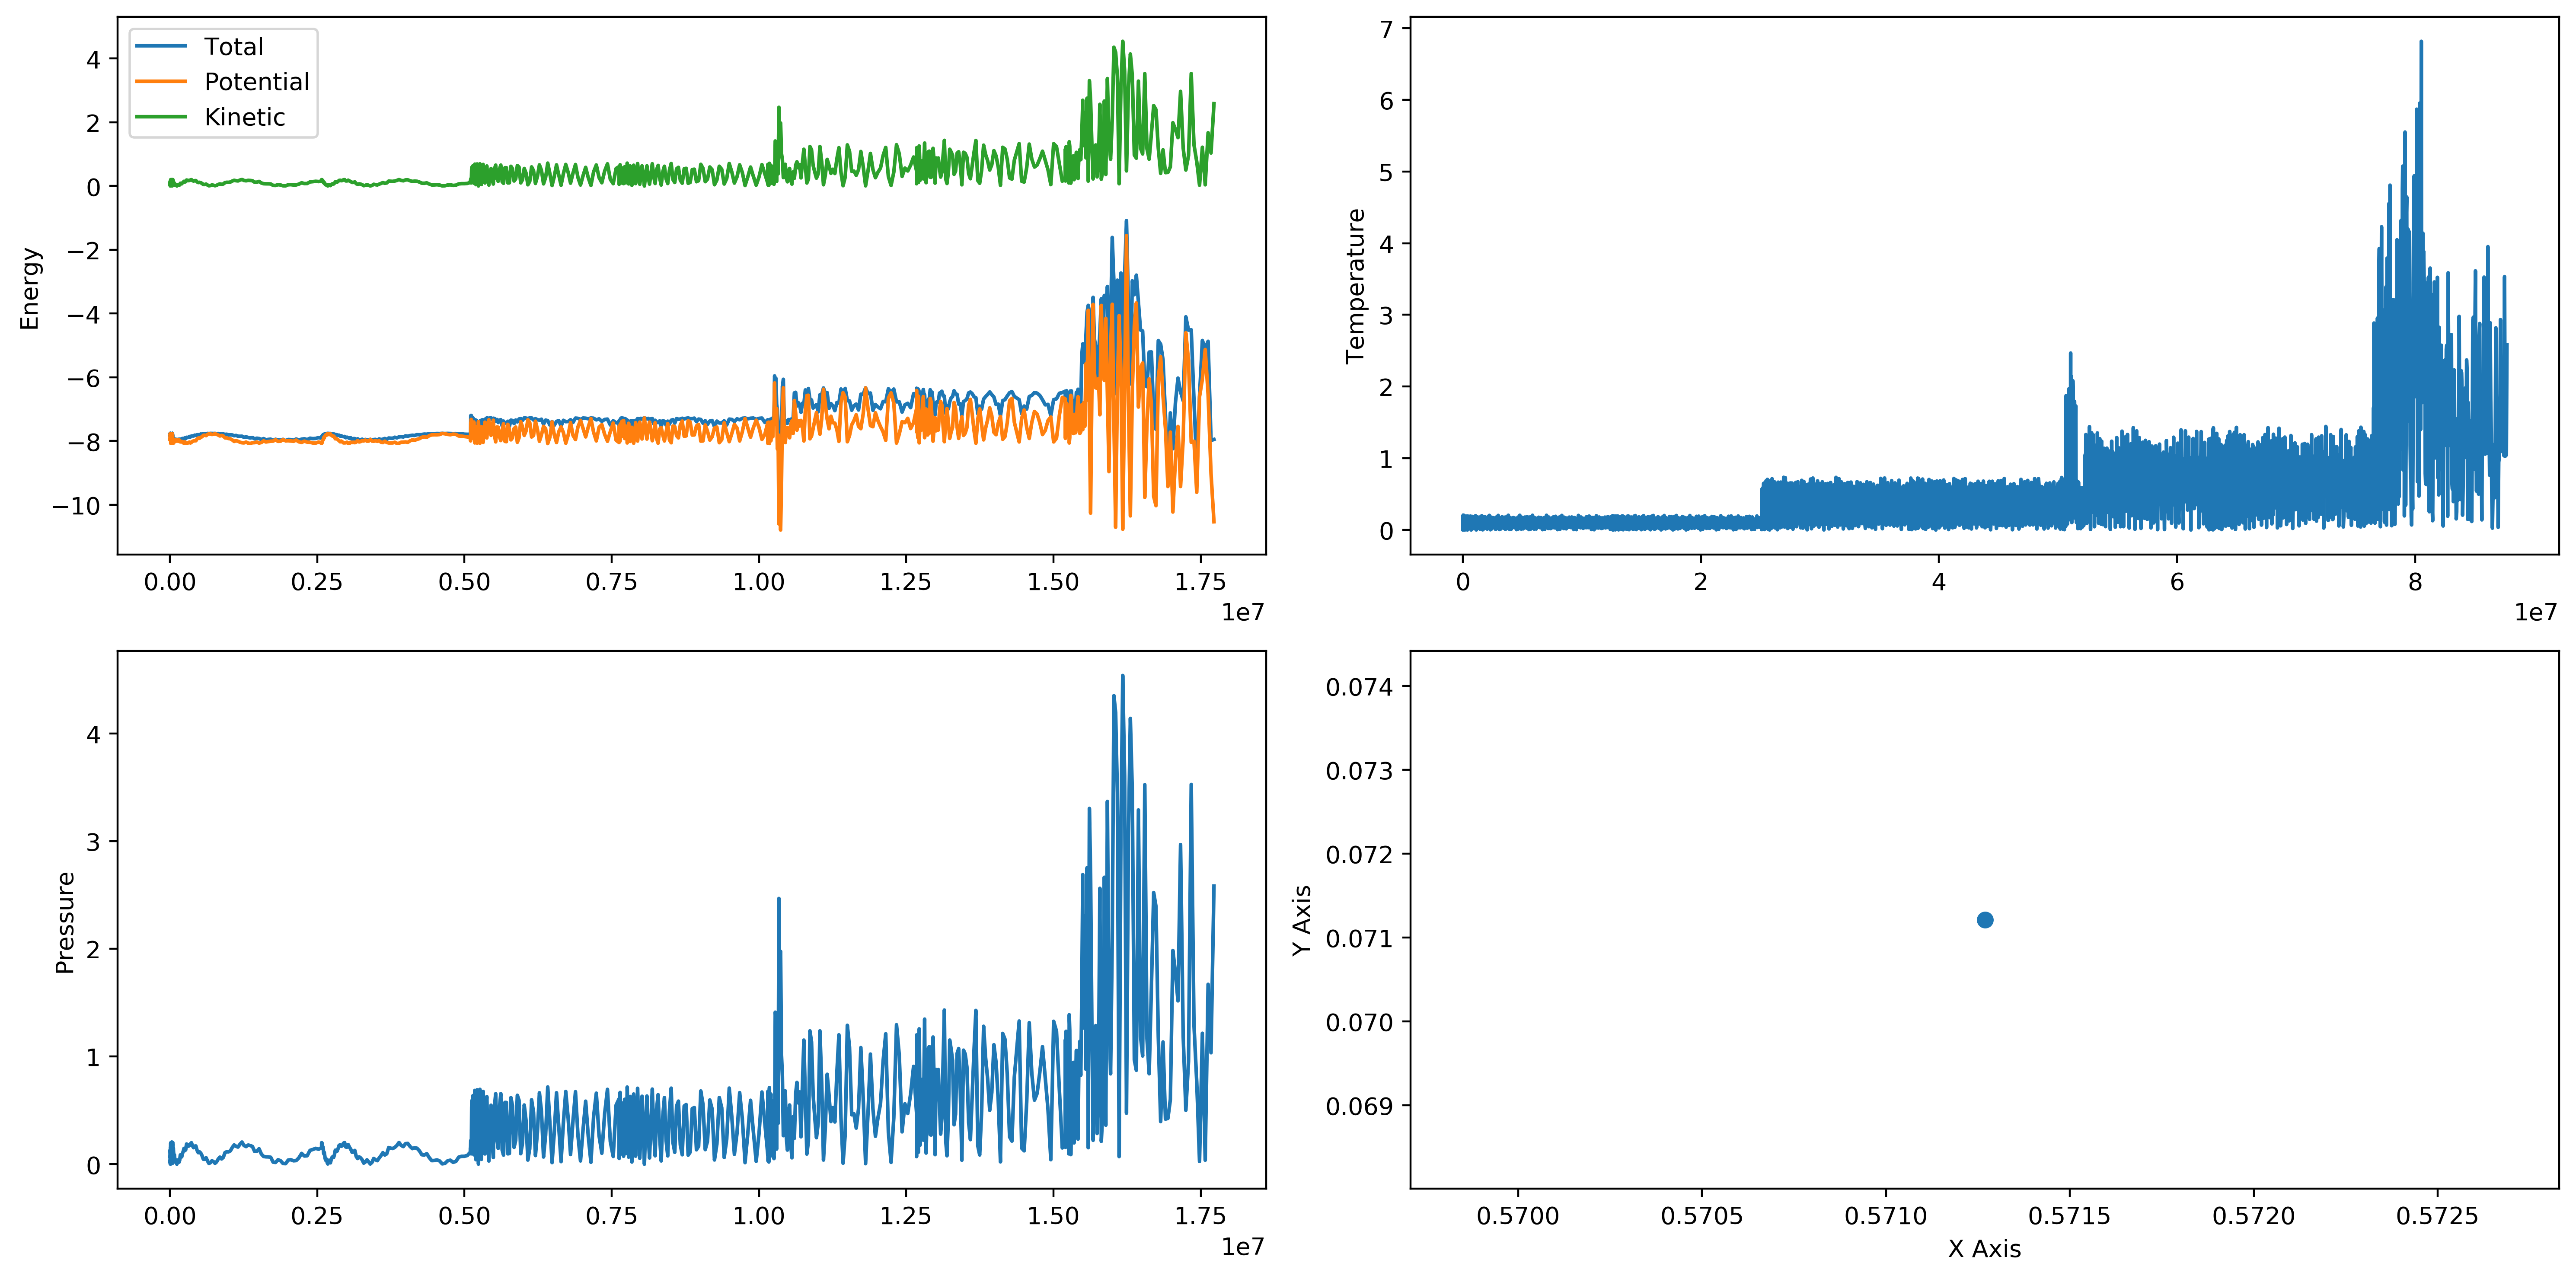

In [88]:
data_plot(system_2, energy_logger_2, temp_logger_2, pressure_logger_2)

In [89]:
np.average(temp_logger_2.T[-int(len(temp_logger_2.T)*0.4):])

0.882522384418126

In [90]:
muller = potentials.MuellerPotential(alpha = 0.1,
                             A = [-200, -100, -170, 15],
                             a = [-1, -1, -6.5, 0.7],
                             b = [0, 0, 11, 0.6],
                             c = [-10, -10, -6.5, 0.7],
                             xj = [1, 0, -0.5, -1],
                             yj = [0, 0.5, 1.5, 1]
                            )

In [ ]:
x_traj = np.array(coords_logger_2.coordinates[-5000:])
ani = visuals.make_2D_traj_potential(x_traj, muller, xlim = [-1.5,1], ylim = [-0.5, 2], markersize=5)
ani

In [ ]:
muller = potentials.MuellerPotential(alpha = 0.1,
                             A = [-200, -100, -170, 15],
                             a = [-1, -1, -6.5, 0.7],
                             b = [0, 0, 11, 0.6],
                             c = [-10, -10, 6.5, 0.7],
                             xj = [1, 0, -0.5, -1],
                             yj = [0, 0.5, 1.5, 1]
                            )
X, Y = np.meshgrid(np.linspace(-1,1,20), np.linspace(0,2,20))

In [ ]:
muller = potentials.MuellerPotential(alpha = 0.1,
                             A = [-200, -100, -170, 15],
                             a = [-1, -1, -6.5, 0.7],
                             b = [0, 0, 11, 0.6],
                             c = [-10, -10, -6.5, 0.7],
                             xj = [1, 0, -0.5, -1],
                             yj = [0, 0.5, 1.5, 1]
                            )
X, Y = np.meshgrid(np.linspace(-10,10,50), np.linspace(-10,10,50))

In [ ]:
Z = []
for i in range(len(X)):
    z = []
    for j in range(len(X)):
        v = muller([X[i,j], Y[i,j]])
        if v > 10:
            z.append(10)
        else:
            z.append(v)
    Z.append(z)
Z = np.array(Z)

In [ ]:
fig, ax = plt.subplots()
cs = ax.contourf(X,Y,Z, levels = 100)
cbar = fig.colorbar(cs)